# Exploratory Data Analysis on NETFLIX

## Problem Statement :

"The Netflix dataset provides insights into how content varies across movies and TV shows in terms of ratings, genres, release trends, duration, and global distribution. By analyzing this data, we aim to understand whether TV shows or movies perform better, which genres and countries dominate Netflix’s catalog, how content duration impacts engagement, and how release patterns have evolved over time. This analysis helps uncover viewer preferences, regional content strengths, and strategic gaps that Netflix can leverage to optimize content production, improve recommendations, and expand its global reach."

### Cleaning the Data

In [ ]:
#Importing all the necessary libraries to perform EDA

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the netflix dataset to the Jupyter Notebook

In [79]:
netflix_df = pd.read_csv(r"F:\Github\netflix_titles.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [80]:
#Understanding the Number of Rows and Columns present in the dataset. 
netflix_df.shape

(8807, 12)

In [81]:
#Learning about the colums present in our dataset
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [82]:
#Understanding the Data-type, Non-Null Count of each column
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [83]:
#Checking for the Null values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [22]:
netflix_df.duplicated().sum()


np.int64(0)

In [84]:
#Since we have a lot of duplicate values in the 'director' and 'cast' we are dropping those values and there is no future scope of analysis on 'description' and 'duration' hence dropping those too.
df = netflix_df.drop(['director','cast','description'],axis=1)
df.head(5)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [27]:
#Filling all the null values with 'Missing'
df.fillna({"country":"Missing","date_added":"Missing","rating":"Missing"},inplace=True)

In [28]:
#Checking for the Null values after treating it.
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
dtype: int64

In [53]:
#Checking the unique values in rating column for future analysis
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Missing', 'TV-Y7-FV', 'UR'], dtype=object)

In [54]:
# Drop rows with incorrect rating values
df = netflix_df[~netflix_df["rating"].isin(["74 min", "84 min", "66 min"])]

In [55]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

In [85]:
#Checking unique values in duration
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [94]:
# Identify duration type (Minutes or Seasons)
df["duration_type"] = df["duration"].apply(
    lambda x: "Minutes" if "min" in str(x) else ("Seasons" if "Season" in str(x) else np.nan)
)

# Extract numeric part only
df["duration_num"] = df["duration"].str.extract("(\d+)").astype(float)

# Quick check
df[["type", "duration","duration_num"]].head(10)

,type,duration,duration_num
0,Movie,90 min,90.0
1,TV Show,2 Seasons,2.0
2,TV Show,1 Season,1.0
3,TV Show,1 Season,1.0
4,TV Show,2 Seasons,2.0
5,TV Show,1 Season,1.0
6,Movie,91 min,91.0
7,Movie,125 min,125.0
8,TV Show,9 Seasons,9.0
9,Movie,104 min,104.0


## Analysis 

### Finding the distribution between The Movie and The TV Shows on Netflix

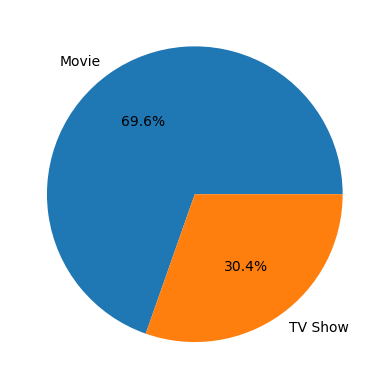

In [35]:
df.type.value_counts().to_frame("Counts")

plt.pie(df['type'].value_counts(),labels =["Movie","TV Show"],autopct="%1.1f%%")
plt.show()

Insights: We can see that Netflix hosts almost 70% of Movies and about 30% of the TV Shows in it's paltform.

### Top 5 Countries which has released their content on Netfilx

Text(0, 0.5, 'Movie Released')

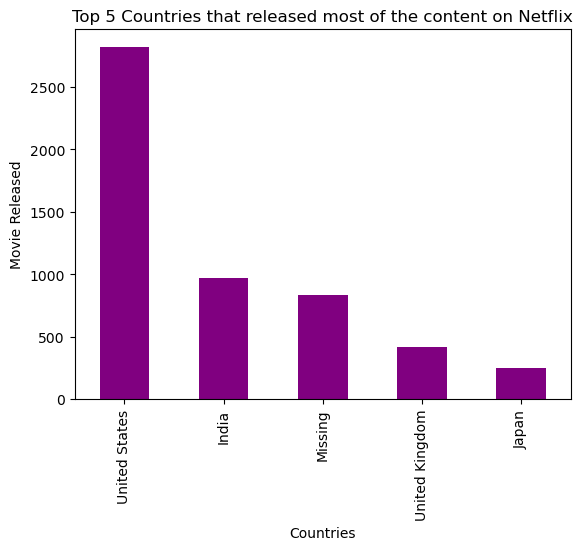

In [46]:
df1 = df["country"].value_counts().head(5) \
.plot(kind='bar',color="purple")
df1.set_title("Top 5 Countries that released most of the content on Netflix",fontsize=12)
df1.set_xlabel("Countries")
df1.set_ylabel("Movie Released")

In [ ]:
Insights: 
1.We can see that United States has around 2700 releases on the Netflix alomst more than 1500 numbers from the second highest country that is India.
2.The least releases being from Japan which is less than 500 releases.
3. From this we can say that comparitively Unites States movie making industry is alot bigger than the other countries.

### Type of Ratings The Movies and The TV Shows gotten in Netflix platform 

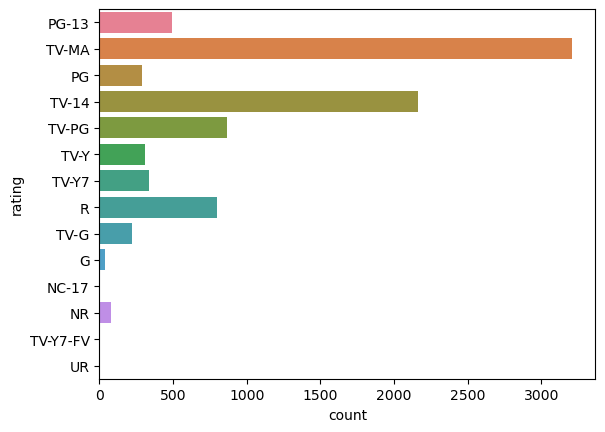

In [57]:
sns.countplot(y=df['rating'],orient='h',palette="husl")
plt.xticks(rotation=0)
plt.show()

Insights:
1. We can understand the different type of ratings the movies/shows rated on Netflix.
2. The highest type of rating gotten on Netflix is TV-MA which more than 3000 in count.
3. Most Audience prefers TV-MA and TV-14 rated content Less prefers UR, NC-17 and TV-Y7-FV content.

### Number of releases from each Year

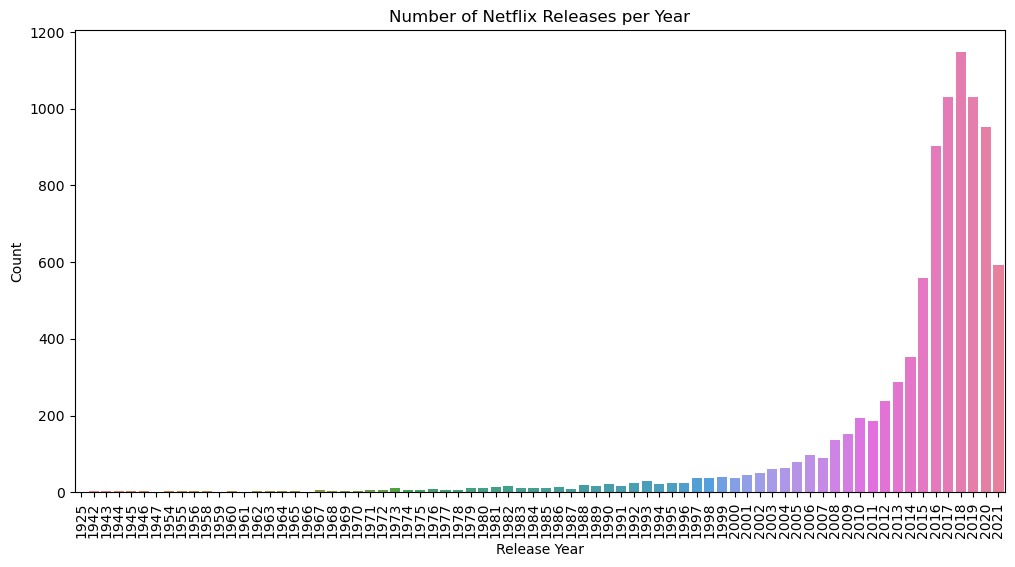

In [64]:
release_counts = df.groupby("release_year")["show_id"].count().reset_index()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="release_year", palette="husl")
plt.xticks(rotation=90)
plt.title("Number of Netflix Releases per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

Insights:
1. We can see that movie making has been increasing consistently, which speaks the growth of movie industry through the years.
2. We can see that in 2018 highest number of releases has happened on Netflix.

### Top 10 genres on Netflix

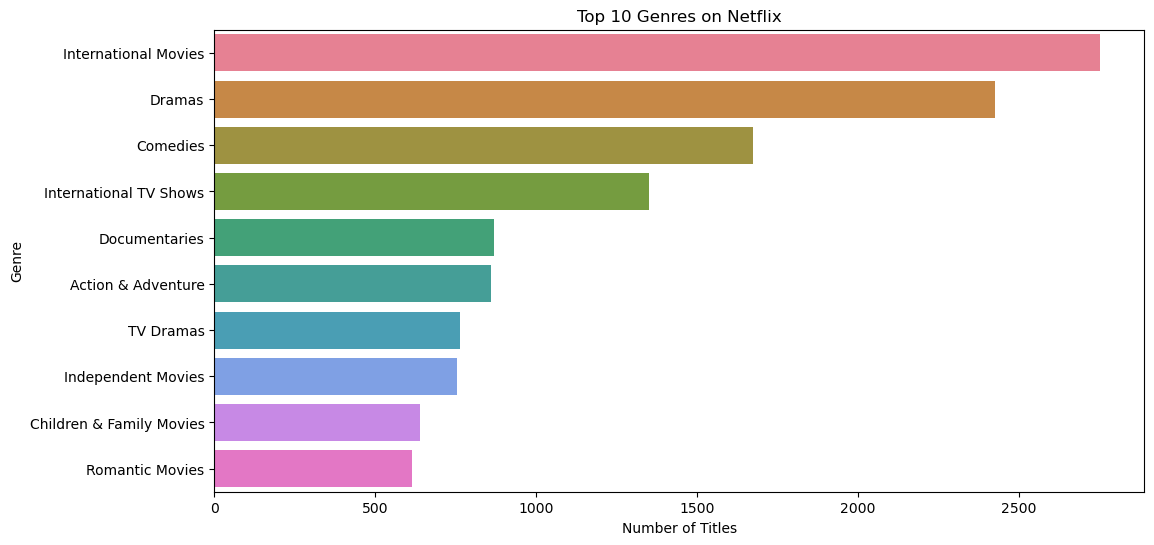

In [70]:
from collections import Counter

# Split genres and count
genre_counts = Counter([genre.strip() for sublist in df['listed_in'].dropna().str.split(',') for genre in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=["Genre", "Count"])

plt.figure(figsize=(12,6))
sns.barplot(x="Count", y="Genre", data=top_genres, palette="husl")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

Insights:
1. We can clearly see that International Movies are liked a lot by the Netflix subscribers.
2. The top 3 most liked genres are International Movies, Dramas and Comedies while comparitively Romantic movies draws less audience.

### Average release year of Movies vs TV Shows

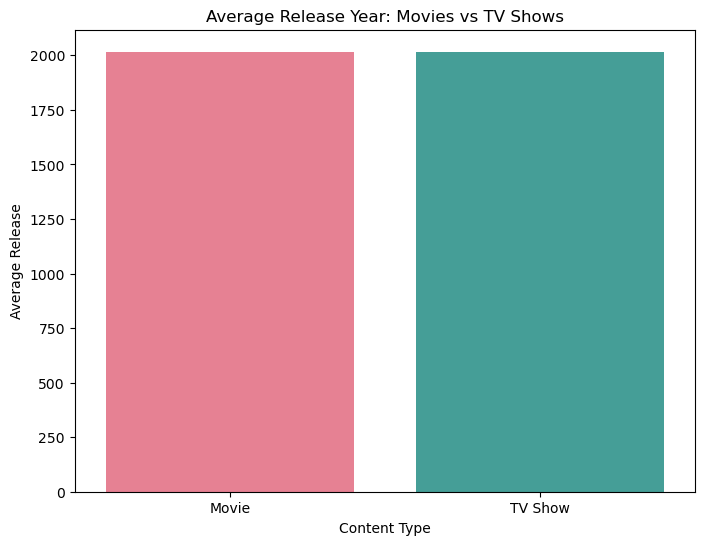

In [77]:
avg_release = df.groupby("type")["release_year"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x="type", y="release_year", data=avg_release, palette="husl")
plt.title("Average Release Year: Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Average Release")
plt.show()

Insights:
1. Here we can see that the competition between the movie and the TV shows are neck to neck.
2. The Average release from both the movie and TV industry on Netflix is almost equal.
3. This shows the growth of the TV shows through the years. 

### Top 10 countries producing Movies vs TV Shows

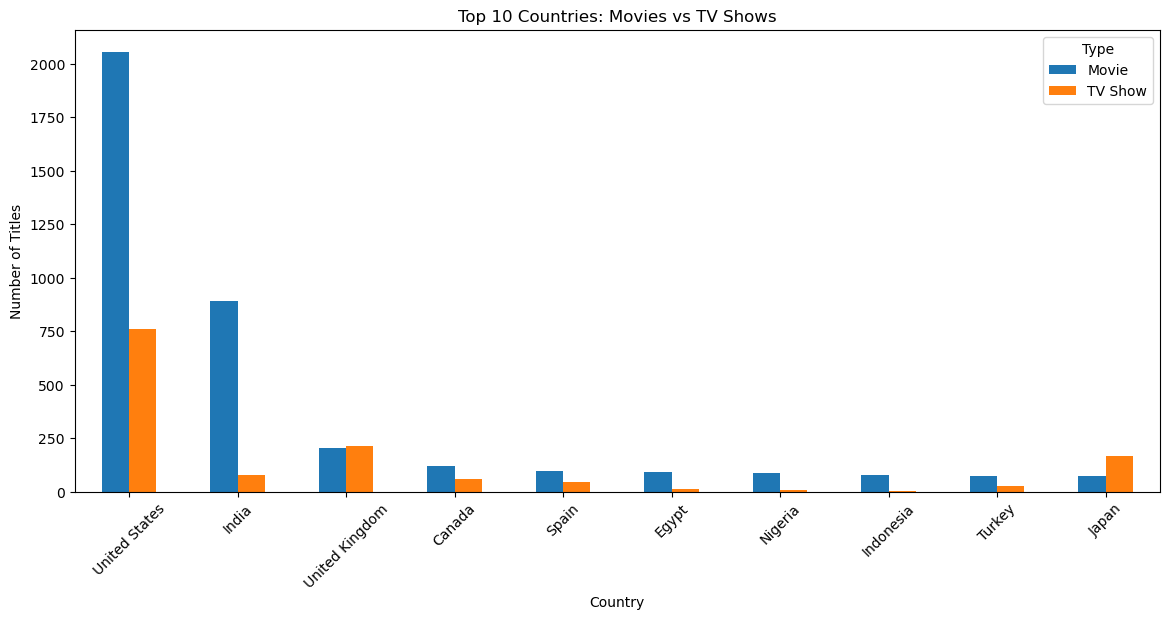

In [78]:
country_type = df.groupby(["country", "type"]).size().unstack(fill_value=0).sort_values(by="Movie", ascending=False).head(10)

country_type.plot(kind="bar", figsize=(14,6), color=["#1f77b4", "#ff7f0e"])
plt.title("Top 10 Countries: Movies vs TV Shows")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()

Insights:
1. We can see that US and India have given the most releases on Netflix
2. We can see that in US and India Movies are made alot while in Japan and UK TC shows plays a major role in the industry.
3. We can also see the wide range of difference in Movie/TV-shows from each country.

### Content distribution by duration (Movies vs TV Shows)

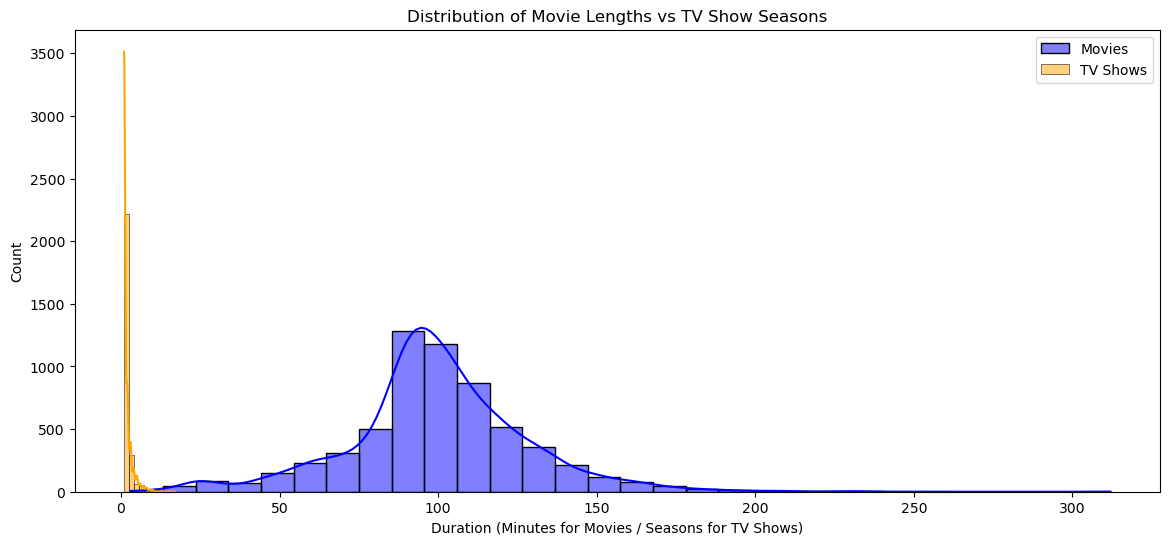

In [95]:
# Separate movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

plt.figure(figsize=(14,6))

sns.histplot(movies['duration_num'], bins=30, color="blue", label="Movies", kde=True)
sns.histplot(tv_shows['duration_num'], bins=10, color="orange", label="TV Shows", kde=True)

plt.title("Distribution of Movie Lengths vs TV Show Seasons")
plt.xlabel("Duration (Minutes for Movies / Seasons for TV Shows)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
Insights:
1.Movies mostly run 80–120 mins, peaking around 90 mins.
2.Movies are consistent in length, while TV shows are mostly short-lived.
3.Since the duration of the episode/show is short, we can see that the engagement on the TV-show is more compared to the Movies.